# Introduction
- <span class="mark">Evaluating a model is a core part of building an effective machine learning model</span>  
- Different evaluation metrics are used for different kinds of problems  

- <span class="mark">The idea of building machine learning models works on a constructive feedback principle. You build a model, get feedback from metrics, make improvements and continue until you achieve a desirable accuracy. Evaluation metrics explain the performance of a model.</span> An important aspect of evaluation metrics is their capability to discriminate among model results.  

- building a predictive model is not your motive. It’s about creating and selecting a model which gives high accuracy on out of sample data. Hence, it is crucial to check the accuracy of your model prior to computing predicted values.  

-  consider different kinds of metrics to evaluate our models. <span class="mark">The choice of metric completely depends on the type of model and the implementation plan of the model.</span>    
- 1.Confusion Matrix  
- 2. F1 Score   
- 3. Gain and Lift Charts  
- 4. Kolmogorov Smirnov Chart  
- 5. AUC – ROC  
- 6. Log Loss  
- 7. Gini Coefficient  
- 8. Concordant – Discordant Ratio  
- 9. Root Mean Squared Error  
- 10.Cross Validation (Not a metric though!)
- 11.) Accuracy
- 12) precision
- 13) Recall

# Warming up: Types of Predictive models
In classification problems, we use two types of algorithms (dependent on the kind of output it creates):  

- **Class output**: <span class="mark">Algorithms like SVM and KNN create a class output</span>. For instance, in a binary classification problem, the outputs will be either 0 or 1. However, today we have algorithms which can convert these class outputs to probability. But these algorithms are not well accepted by the statistics community.  
- **Probability output**: Algorithms like Logistic Regression, Random Forest, Gradient Boosting, Adaboost etc. give probability outputs. Converting probability outputs to class output is just a matter of creating a threshold probability.
- In regression problems, we do not have such inconsistencies in output. The output is always continuous in nature and requires no further treatment.  


## Confusion Matrix
- A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. Here are a few definitions, you need to remember for a confusion matrix :  

**Accuracy** : the proportion of the total number of predictions that were correct.  
**Positive Predictive Value or Precision** : the proportion of positive cases that were correctly identified.   
**Negative Predictive Value** : the proportion of negative cases that were correctly identified.  
**Sensitivity or Recall** : the proportion of actual positive cases which are correctly identified.  
**Specificity** : the proportion of actual negative cases which are correctly identified.  
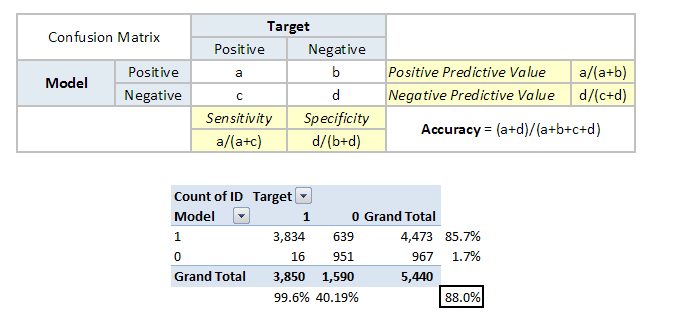
The accuracy for the problem in hand comes out to be 88%.  As you can see from the above two tables, the Positive predictive Value is high, but negative predictive value is quite low. Same holds for Sensitivity and Specificity. This is primarily driven by the threshold value we have chosen. If we decrease our threshold value, the two pairs of starkly different numbers will come closer.   

In general we are concerned with one of the above defined metric. For instance, in a pharmaceutical company, they will be more concerned with minimal wrong positive diagnosis. Hence, they will be more concerned about high Specificity. On the other hand an attrition model will be more concerned with Sensitivity. Confusion matrix are generally used only with class output models.   

## F1 Score
- What if for a use case, we are trying to get the best precision and recall at the same time? <span class="mark">F1-Score is the harmonic mean of precision and recall values for a classification problem</span>. The formula for F1-Score is as follows:  
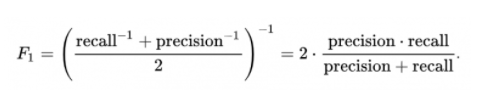
Now, an obvious question that comes to mind is why are taking a harmonic mean and not an arithmetic mean. <span class="mark">This is because HM punishes extreme values more.</span> Let us understand this with an example. We have a binary classification model with the following results:   

**Precision: 0, Recall: 1**  

Here, if we take the arithmetic mean, we get 0.5. It is clear that the above result comes from a dumb classifier which just ignores the input and just predicts one of the classes as output. Now, if we were to take HM, we will get 0 which is accurate as this model is useless for all purposes.  

This seems simple. There are situations however for which a data scientist would like to give a percentage more importance/weight to either precision or recall. Altering the above expression a bit such that we can include an adjustable parameter beta for this purpose, we get:    

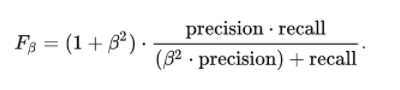
Fbeta measures the effectiveness of a model with respect to a user who attaches β times as much importance to recall as precision.   

- We don’t really want to carry both Precision and Recall in our pockets every time we make a model for solving a classification problem. So it’s best if we can get a single score that kind of represents both Precision(P) and Recall(R).
- One way to do that is simply taking their arithmetic mean. i.e (P + R) / 2 where P is Precision and R is Recall. But that’s pretty bad in some situations. 
- Suppose we have 100 credit card transactions, of which 97 are legit and 3 are fraud and let’s say we came up a model that predicts everything as fraud. (Horrendous right!?)
- Precision and Recall for the example is shown in the fig below.
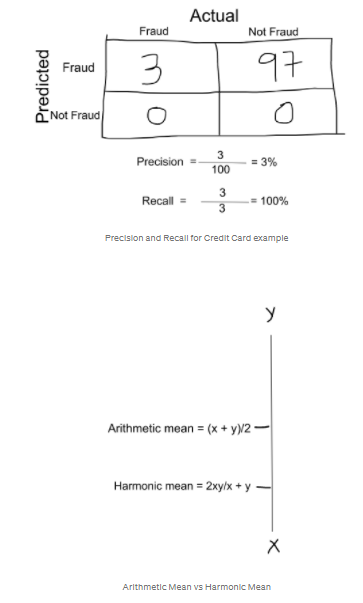
- Now, if we simply take arithmetic mean of both, then it comes out to be nearly 51%. We shouldn’t be giving such a moderate score to a terrible model since it’s just predicting every transaction as fraud.
- So, we need something more balanced than the arithmetic mean and that is harmonic mean.
- The Harmonic mean is given by the formula shown in the figure on the left.
- Harmonic mean is kind of an average when x and y are equal. But when x and y are different, then it’s closer to the smaller number as compared to the larger number. 
- For our previous example, F1 Score = Harmonic Mean(Precision, Recall) 
- F1 Score = 2 * Precision * Recall / (Precision + Recall) = 2*3*100/103 = 5%
- So if one number is really small between precision and recall, the F1 Score kind of raises a flag and is more closer to the smaller number than the bigger one, giving the model an appropriate score rather than just an arithmetic mean.

## Gain and Lift charts
https://www.geeksforgeeks.org/understanding-gain-chart-and-lift-chart/
https://www.datasciencecentral.com/profiles/blogs/understanding-and-interpreting-gain-and-lift-charts
- The gain chart and lift chart are two measures that are used for Measuring the benefits of using the model and are used in business contexts such as target marketing. It’s not just restricted to marketing analysis. It can also be used in other domains such as risk modeling, supply chain analytics, etc. In other words, <span class="mark">Gain and Lift charts are two approaches used while solving classification problems with imbalanced data sets</span>  

Gain and Lift chart are mainly concerned to check the rank ordering of the probabilities. Here are the steps to build a Lift/Gain chart:  

Step 1 : Calculate probability for each observation  

Step 2 : Rank these probabilities in decreasing order.  

Step 3 : Build deciles with each group having almost 10% of the observations.  

Step 4 : Calculate the response rate at each deciles for Good (Responders) ,Bad (Non-responders) and total.  

You will get following table from which you need to plot Gain/Lift charts:  
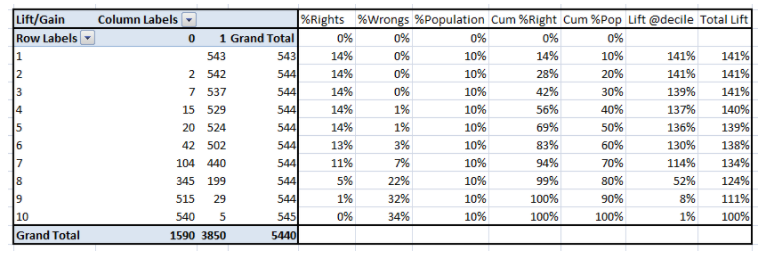
- This is a very informative table. Cumulative Gain chart is the graph between Cumulative %Right and Cummulative %Population. For the case in hand here is the graph :

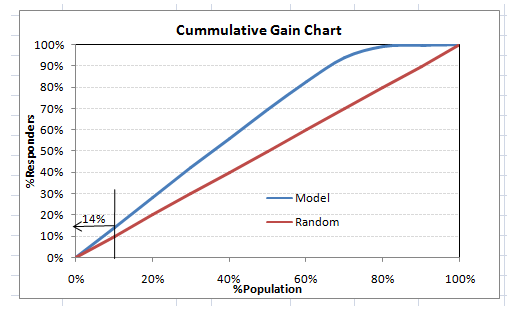
This graph tells you how well is your model segregating responders from non-responders. For example, the first decile however has 10% of the population, has 14% of responders. This means we have a 140% lift at first decile.  

What is the maximum lift we could have reached in first decile? From the first table of this article, we know that the total number of responders are 3850. Also the first decile will contains 543 observations. Hence, the maximum lift at first decile could have been 543/3850 ~ 14.1%. Hence, we are quite close to perfection with this model.  

Let’s now plot the lift curve. Lift curve is the plot between total lift and %population. Note that for a random model, this always stays flat at 100%. Here is the plot for the case in hand :  


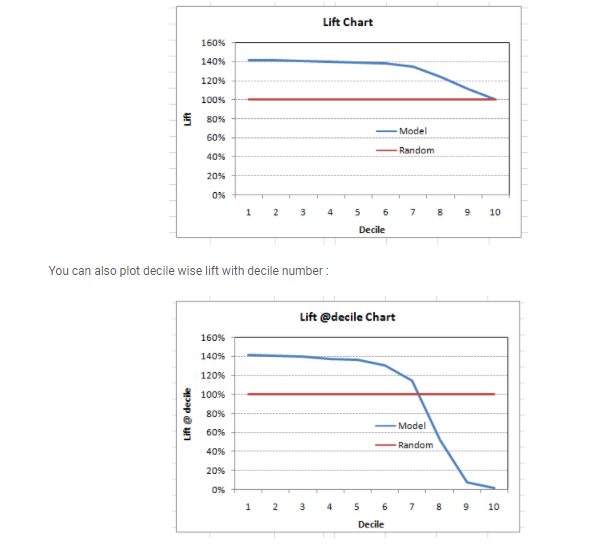
What does this graph tell you? It tells you that our model does well till the 7th decile. Post which every decile will be skewed towards non-responders. Any model with lift @ decile above 100% till minimum 3rd decile and maximum 7th decile is a good model. Else you might consider over sampling first.   

Lift / Gain charts are widely used in campaign targeting problems. This tells us till which decile can we target customers for an specific campaign. Also, it tells you how much response do you expect from the new target base.  

## Kolomogorov Smirnov chart
K-S or Kolmogorov-Smirnov chart measures performance of classification models. More accurately, K-S is a measure of the degree of separation between the positive and negative distributions. The K-S is 100, if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives.   

On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0. In most classification models the K-S will fall between 0 and 100, and that the higher the value the better the model is at separating the positive from negative cases.  

For the case in hand, following is the table   
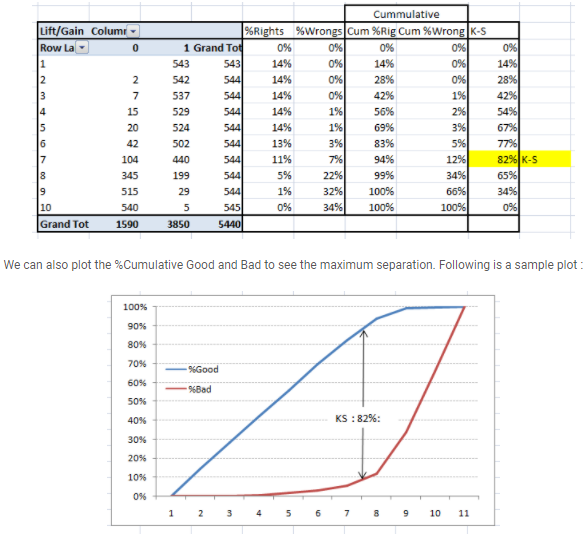
The metrics covered till here are mostly used in classification problems. Till here, we learnt about confusion matrix, lift and gain chart and kolmogorov-smirnov chart. Let’s proceed and learn few more important metrics.  

## Area Under the ROC curve (AUC – ROC)
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
You’ve built your machine learning model – so what’s next? You need to evaluate it and validate how good (or bad) it is, so you can then decide on whether to implement it. That’s where the AUC-ROC curve comes in.  

The name might be a mouthful, but it is just saying that we are calculating the “Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)  
 <span class="mark">AUC-ROC curve helps us visualize how well our machine learning classifier is performing.</span> Although it works for only binary classification problems, we will see towards the end how we can extend it to evaluate multi-class classification problems too. 

We’ll cover topics like sensitivity and specificity as well since these are key topics behind the AUC-ROC curve.  

### What are Sensitivity and Specificity?
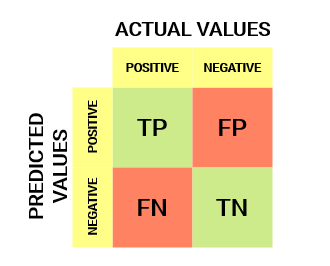


#### Sensitivity / True Positive Rate / Recall
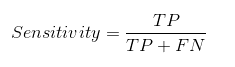
<span class="mark">Sensitivity tells us what proportion of the positive class got correctly classified</span>.   
- True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)  

A simple example would be to determine what proportion of the actual sick people were correctly detected by the model.   

Ex: The case where a person is actually having cancer(1) and the model classifying his case as cancer(1) comes under True positive.  

#### False Negative Rate
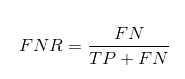
<span class="mark">False Negative Rate (FNR) tells us what proportion of the positive class got incorrectly classified by the classifier.</span>  

A higher TPR and a lower FNR is desirable since we want to correctly classify the positive class.   
-  <span class="mark">False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False is because the model has predicted incorrectly and negative because the class predicted was a negative one. (0)  
Ex: A person having cancer and the model classifying his case as No-cancer comes under False Negatives.</span>  

#### Specificity / True Negative Rate
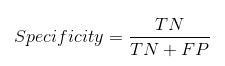
<span class="mark">Specificity tells us what proportion of the negative class got correctly classified.</span>   

Taking the same example as in Sensitivity, Specificity would mean determining the proportion of healthy people who were correctly identified by the model.     
- True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False  



#### False Positive Rate
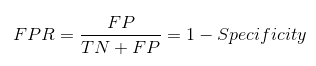
<span class="mark">FPR tells us what proportion of the negative class got incorrectly classified by the classifier.</span>  

A higher TNR and a lower FPR is desirable since we want to correctly classify the negative class.  

Out of these metrics, Sensitivity and Specificity are perhaps the most important and we will see later on how these are used to build an evaluation metric. But before that, let’s understand why the probability of prediction is better than predicting the target class directly.   
- False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). False is because the model has predicted incorrectly and positive because the class predicted was a positive one. (1)  
<span class="mark">Ex: A person NOT having cancer and the model classifying his case as cancer comes under False Positives.</span>  

#### When to minimise what?
We know that there will be some error associated with every model that we use for predicting the true class of the target variable. This will result in False Positives and False Negatives(i.e Model classifying things incorrectly as compared to the actual class).  
There’s no hard rule that says what should be minimised in all the situations. It purely depends on the business needs and the context of the problem you are trying to solve. Based on that, we might want to minimise either False Positives or False negatives.  

#### Minimising False Negatives:
Let’s say in our cancer detection problem example, out of 100 people, only 5 people have cancer. In this case, we want to correctly classify all the cancerous patients as even a very BAD model(Predicting everyone as NON-Cancerous) will give us a 95% accuracy(will come to what accuracy is). But, in order to capture all cancer cases, we might end up making a classification when the person actually NOT having cancer is classified as Cancerous. This might be okay as it is less dangerous than NOT identifying/capturing a cancerous patient since we will anyway send the cancer cases for further examination and reports. But missing a cancer patient will be a huge mistake as no further examination will be done on them.   

#### Minimising False Positives:
<span class="mark">For better understanding of False Positives, let’s use a different example where the model classifies whether an email is spam or not</span>  
Let’s say that you are expecting an important email like hearing back from a recruiter or awaiting an admit letter from a university. Let’s assign a label to the target variable and say,1: “Email is a spam” and 0:”Email is not a spam”
Suppose the Model classifies that important email that you are desperately waiting for, as Spam(case of False positive). Now, in this situation, this is pretty bad than classifying a spam email as important or not spam since in that case, we can still go ahead and manually delete it and it’s not a pain if it happens once a while. So in case of Spam email classification, minimising False positives is more important than False Negatives.  

#### Probability of Predictions
A machine learning classification model can be used to predict the actual class of the data point directly or predict its probability of belonging to different classes. We can determine our own threshold to interpret the result of the classifier.  

Setting different thresholds for classifying positive class for data points will inadvertently change the Sensitivity and Specificity of the model. And one of these thresholds will probably give a better result than the others, depending on whether we are aiming to lower the number of False Negatives or False Positives.   
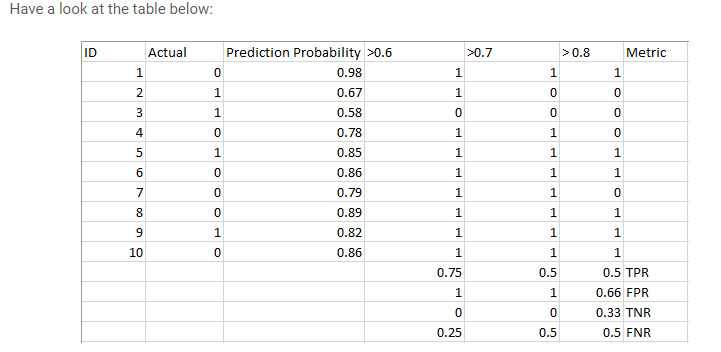
The metrics change with the changing threshold values. We can generate different confusion matrices and compare the various metrics that we discussed in the previous section. But that would not be a prudent thing to do. Instead, what we can do is generate a plot between some of these metrics so that we can easily visualize which threshold is giving us a better result.

The AUC-ROC curve solves just that problem!  

#### What is the AUC-ROC curve?
<span class="mark">The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems</span>. <span class="mark">It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.</span>  
**The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.**
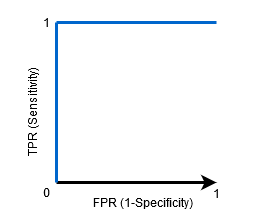
<span class="mark">When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.</span>

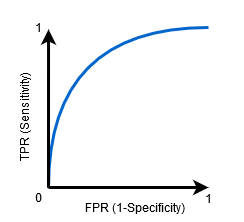
<span class="mark">When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.</span>


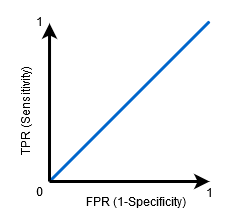
<span class="mark">When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.</span>

**So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.**

#### How Does the AUC-ROC Curve Work?
In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. So, the choice of the threshold depends on the ability to balance between False positives and False negatives.  

Let’s dig a bit deeper and understand how our ROC curve would look like for different threshold values and how the specificity and sensitivity would vary.  
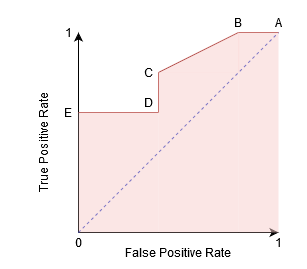
We can try and understand this graph by generating a confusion matrix for each point corresponding to a threshold and talk about the performance of our classifier:

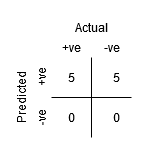
Point A is where the Sensitivity is the highest and Specificity the lowest. This means all the Positive class points are classified correctly and all the Negative class points are classified incorrectly.   
**In fact, any point on the blue line corresponds to a situation where True Positive Rate is equal to False Positive Rate.**  

**All points above this line correspond to the situation where the proportion of correctly classified points belonging to the Positive class is greater than the proportion of incorrectly classified points belonging to the Negative class.**

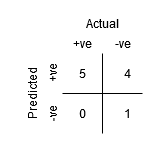
Although Point B has the same Sensitivity as Point A, it has a higher Specificity. Meaning the number of incorrectly Negative class points is lower compared to the previous threshold. This indicates that this threshold is better than the previous one. 

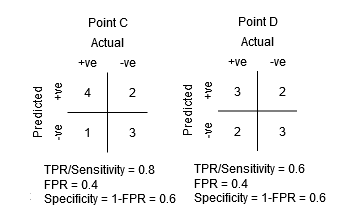
Between points C and D, the Sensitivity at point C is higher than point D for the same Specificity. This means, for the same number of incorrectly classified Negative class points, the classifier predicted a higher number of Positive class points. Therefore, the threshold at point C is better than point D.   

Now, depending on how many incorrectly classified points we want to tolerate for our classifier, we would choose between point B or C for predicting whether you can defeat me in PUBG or not.  

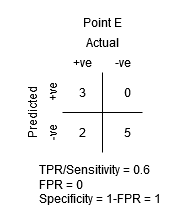
Point E is where the Specificity becomes highest. Meaning there are no False Positives classified by the model. The model can correctly classify all the Negative class points! We would choose this point if our problem was to give perfect song recommendations to our users.   
  
Going by this logic, can you guess where the point corresponding to a perfect classifier would lie on the graph?  

Yes! It would be on the top-left corner of the ROC graph corresponding to the coordinate (0, 1) in the cartesian plane. It is here that both, the Sensitivity and Specificity, would be the highest and the classifier would correctly classify all the Positive and Negative class points  

#### Understanding the AUC-ROC Curve in Python
create our arbitrary data using the sklearn make_classification method:

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

#test the performance of two classifiers on this dataset:

# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

#Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! 
#It returns the FPR, TPR, and threshold values:#

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#The AUC score can be computed using the roc_auc_score() method of sklearn:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

#output = 0.9761029411764707 0.9233769727403157

ModuleNotFoundError: No module named 'sklearn'

#### We can also plot the ROC curves for the two algorithms using matplotlib:

In [3]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

ModuleNotFoundError: No module named 'matplotlib'

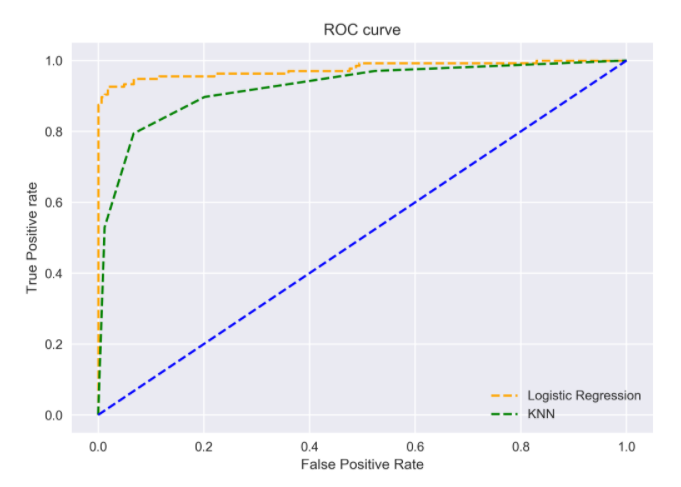
It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.  

### AUC-ROC for Multi-Class Classification
Like I said before, the AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems by using the One vs All technique.  

So, if we have three classes 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e. 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.   

The ROC curve for multi-class classification models can be determined as below   

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

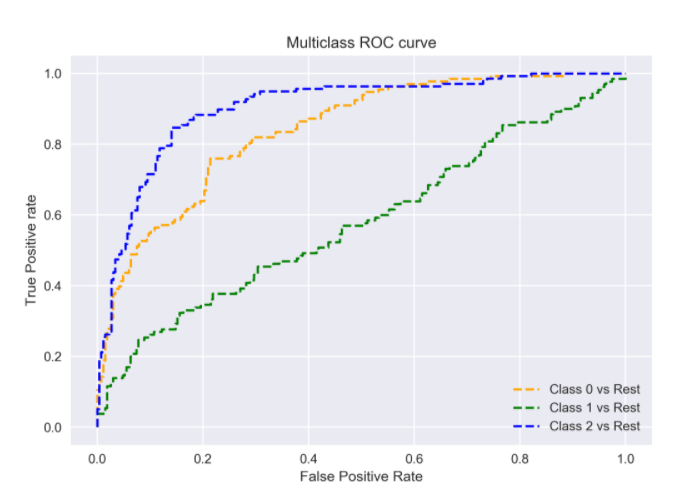

## Log Loss
https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/
- AUC ROC considers the predicted probabilities for determining our model’s performance. However, there is an issue with AUC ROC, it only takes into account the order of probabilities and hence it does not take into account the model’s capability to predict higher probability for samples more likely to be positive. In that case, we could us the log loss which is nothing but negative average of the log of corrected predicted probabilities for each instance 

**Prerequisites for this article:** 
- Linear Regression
- Logistic Regression
- Gradient Descent

### INTRODUCTION
Let’s take a case study of a clothing company that manufactures jackets and cardigans. They want to have a model that can predict whether the customer will buy a jacket (class 1) or a cardigan(class 0) from their historical behavioral pattern so that they can give specific offers according to the customer’s needs. As a data scientist, you need to help them to build a predictive model.  

When we start Machine Learning algorithms, the first algorithm we learn about is `Linear Regression` in which we predict a continuous target variable.   

If we use Linear Regression in our classification problem, we will get a best-fit line like this:   
 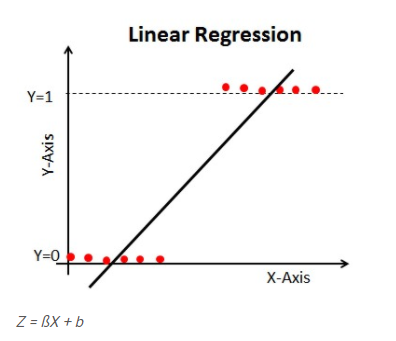
**Problem with the linear line:** 
- When you extend this line, you will have values greater than 1 and less than 0, which do not make much sense in our classification problem. It will make a model interpretation a challenge. That is where `Logistic Regression` comes in. If we needed to predict sales for an outlet, then this model could be helpful. But here we need to classify customers.  

- We need a function to transform this straight line in such a way that values will be between 0 and 1:

**Ŷ = Q (Z)​    
Q (Z) =1​/1+ e-z (Sigmoid Function)    
Ŷ =1​/1+ e-z**   

- <span class="mark">After transformation, we will get a line that remains between 0 and 1</span>. <span class="mark">Another advantage of this function is all the continuous values we will get will be between 0 and 1 which we can use as a probability for making predictions.</span> <span class="mark">For example, if the predicted value is on the extreme right, the probability will be close to 1 and if the predicted value is on the extreme left, the probability will be close to 0.</span>


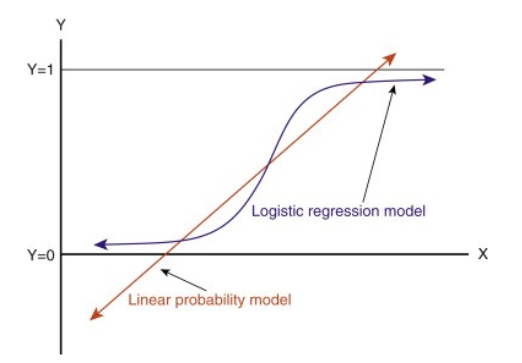
Selecting the right model is not enough. You need a function that measures the performance of a Machine Learning model for given data. Cost Function quantifies the error between predicted values and expected values.  

`If you can’t measure it, you can’t improve it.`  
 
-Another thing that will change with this transformation is Cost Function. I<span class="mark">n Linear Regression, we use `Mean Squared Error` for cost function given by</span>:-  

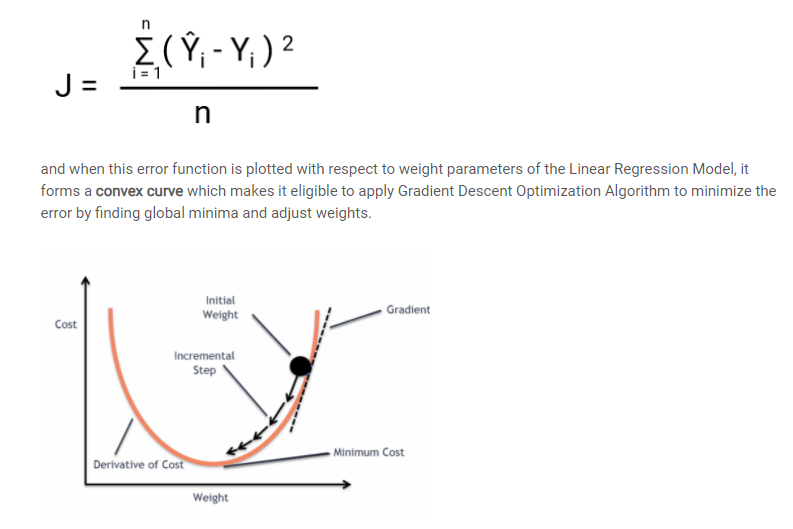


### Why don’t we use `Mean Squared Error as a cost function in Logistic Regression?
<span class="mark">In Logistic Regression Ŷi is a nonlinear function(Ŷ=1​/1+ e-z), if we put this in the above MSE equation it will give a non-convex function as shown</span>:  
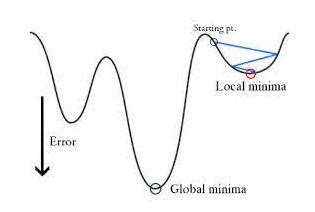
When we try to optimize values using gradient descent it will create complications to find global minima.  

Another reason is in classification problems, we have target values like 0/1, So (Ŷ-Y)2 will always be in between 0-1 which can make it very difficult to keep track of the errors and it is difficult to store high precision floating numbers.  

<span class="mark">The cost function used in Logistic Regression is Log Loss.</span>  

### What is Log Loss?
<span class="mark">Log Loss is the most important classification metric based on probabilities.</span> It’s hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. <span class="mark">For any given problem, a lower log loss value means better predictions</span>.

Mathematical interpretation:  

Log Loss is the negative average of the log of corrected predicted probabilities for each instance.  

Let us understand it with an example: 
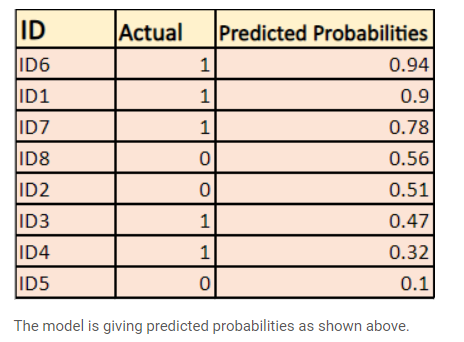

### What are the corrected probabilities?
-> By default, the output of the logistics regression model is the probability of the sample being positive(indicated by 1) i.e if a logistic regression model is trained to classify on a `company  dataset` then the predicted probability column says What is the probability that the person has bought jacket. Here in the above data set the probability that a person with ID6 will buy a jacket is 0.94.   

In the same way, the probability that a person with ID5 will buy a jacket (i.e. belong to class 1) is 0.1 but the actual class for ID5 is 0, so the probability for the class is (1-0.1)=0.9. 0.9 is the correct probability for ID5.  
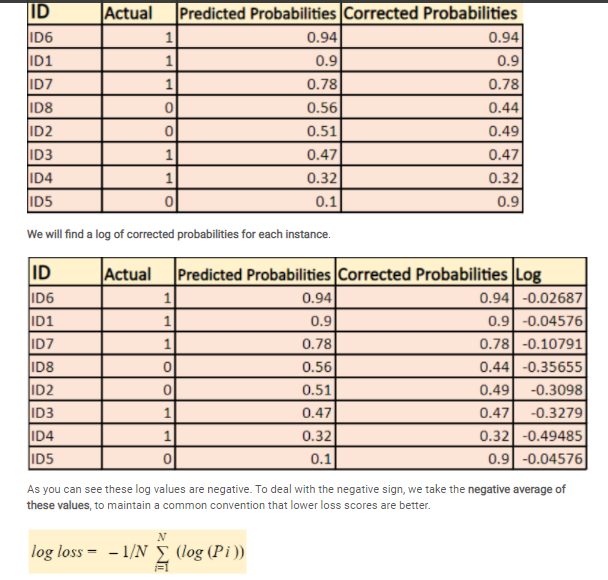

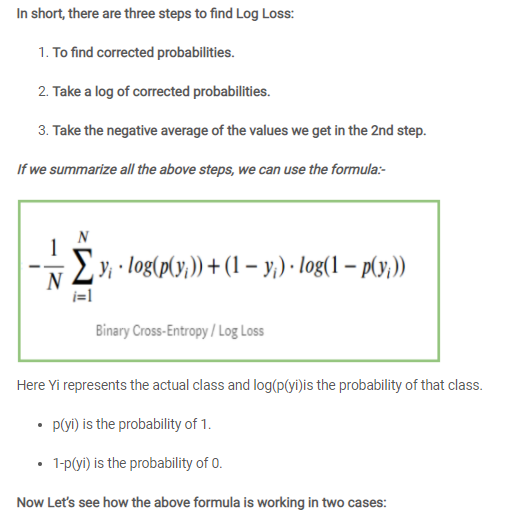
When the actual class is 1: second term in the formula would be 0 and we will left with first term i.e. yi.log(p(yi)) and (1-1).log(1-p(yi) this will be 0.   

When the actual class is 0: First-term would be 0 and will be left with the second term i.e (1-yi).log(1-p(yi)) and 0.log(p(yi)) will be 0.  

wow!! we got back to the original formula for binary cross-entropy/log loss 🙂  

**The benefits of taking logarithm reveal themselves when you look at the cost function graphs for actual class 1 and 0 :**  
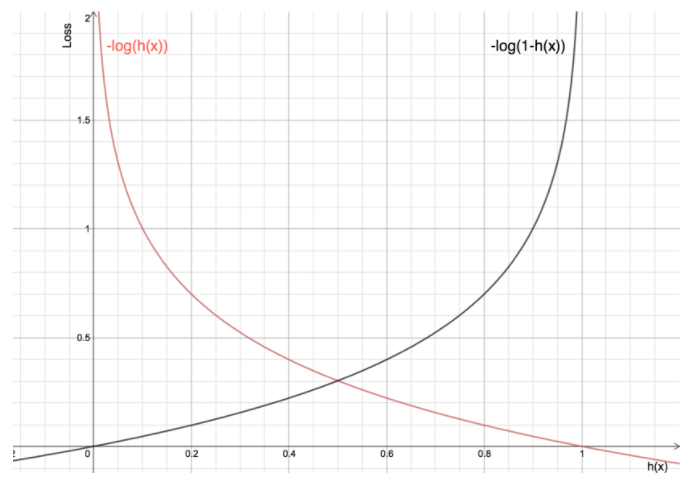
The Red line represents 1 class. As we can see, when the predicted probability (x-axis) is close to 1, the loss is less and when the predicted probability is close to 0, loss approaches infinity.  

The Black line represents 0 class. As we can see, when the predicted probability (x-axis) is close to 0, the loss is less and when the predicted probability is close to 1, loss approaches infinity.  

lower the log loss, better the model. However, there is no absolute measure on a good log loss and it is use-case/application dependent.  

Whereas the AUC is computed with regards to binary classification with a varying decision threshold, log loss actually takes “certainty” of classification into account.  

## Gini Coefficient  
Gini coefficient is sometimes used in classification problems. Gini coefficient can be straigh away derived from the AUC ROC number. Gini is nothing but ratio between area between the ROC curve and the diagnol line & the area of the above triangle. Following is the formulae used :  

Gini = 2*AUC – 1  

Gini above 60% is a good model. For the case in hand we get Gini as 92.7%. 

 Gini or the Gini coefficient is one of the most popular metrics used by the financial industry for evaluating the performance of credit score models.  
  
https://towardsdatascience.com/using-the-gini-coefficient-to-evaluate-the-performance-of-credit-score-models-59fe13ef420

## Concordant – Discordant ratio
- When we think of model evaluations metric - we think of accuracy , recall , precision or f1_score. Today lets see some other well -known methods.  

- Welcome to Concordant & Discordant Pairs     

- Lets take a sample data set which has 1000 sample of which we have 100 events (Target =1) and 900 Non events (Target =0) .
Now when we do predictions we get probabilities for each sample for e.g. [0.3,0.7]. i.e. the probabilities of this sample being Non Event is 0.3 and Event is 0.7.  

- **Step 1 : Pair Creation**  
- Since we have 900 Non Events & 100 Events - we will have 900*100 = 90000 pairs, where each pairs comprises of 2 values ( X, Y ) where X represents probability of Event and Y represents probability of Non Event.

- **Step 2 : Concordant Pairs**    
All the pairs where X > Y are termed as Concordant pairs. for e.g. we have 80000 concordant pairs.

- **step 3 : Discordant Pairs**  
All the pairs where X < Y are termed as Discordant pairs for e.g. we have 7000 discordant pairs.

- **Step 4: Tier Pairs**    
All the pairs where X= Y are termed as Tier Pairs for e.g. we have 3000 tied pairs.  

Count the total number of Concordant pairs and divided by the total number of the pairs i.e.    
Concordance ratio = 80000/90000 = 0.8888 or 88.88%   

Higher the concordance ratio - better is the model.  

**Somers D: This is (% concordant pair - % discordant pair). **    
Somers D = 80000-70000/90000 = 81.11%   
Higher Somers D indicates a better model   

This is again one of the most important metric for any classification predictions problem. To understand this let’s assume we have 3 students who have some likelihood to pass this year. Following are our predictions :    

A – 0.9    

B – 0.5  

C – 0.3   

Now picture this. if we were to fetch pairs of two from these three student, how many pairs will we have? We will have 3 pairs : AB , BC, CA. Now, after the year ends we saw that A and C passed this year while B failed. No, we choose all the pairs where we will find one responder and other non-responder. How many such pairs do we have?   

We have two pairs AB and BC. Now for each of the 2 pairs, the concordant pair is where the probability of responder was higher than non-responder. Whereas discordant pair is where the vice-versa holds true. In case both the probabilities were equal, we say its a tie. Let’s see what happens in our case :   

AB  – Concordant  

BC – Discordant   

Hence, we have 50% of concordant cases in this example. Concordant ratio of more than 60% is considered to be a good model. This metric generally is not used when deciding how many customer to target etc. It is primarily used to access the model’s predictive power. For decisions like how many to target are again taken by KS / Lift charts.  

## Accuracy:
Accuracy in classification problems is the number of correct predictions made by the model over all kinds predictions made. 
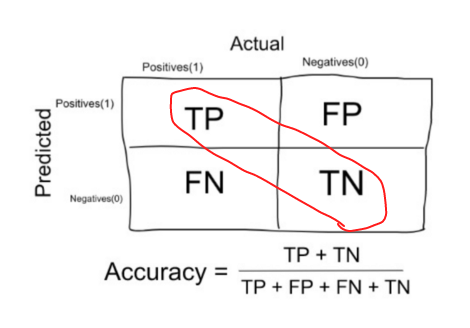
In the Numerator, are our correct predictions (True positives and True Negatives)(Marked as red in the fig above) and in the denominator, are the kind of all predictions made by the algorithm(Right as well as wrong ones).

**When to use Accuracy:**    
<span class="mark">Accuracy is a good measure when the target variable classes in the data are nearly balanced.</span>  
Ex:60% classes in our fruits images data are apple and 40% are oranges.  
A model which predicts whether a new image is Apple or an Orange, 97% of times correctly is a very good measure in this example.   

**When NOT to use Accuracy:**   
<span class="mark">Accuracy should NEVER be used as a measure when the target variable classes in the data are a majority of one class.</span>  
Ex: In our cancer detection example with 100 people, only 5 people has cancer. Let’s say our model is very bad and predicts every case as No Cancer. In doing so, it has classified those 95 non-cancer patients correctly and 5 cancerous patients as Non-cancerous. Now even though the model is terrible at predicting cancer, The accuracy of such a bad model is also 95%.  

## Precision 
Let’s use the same confusion matrix as the one we used before for our cancer detection example.  
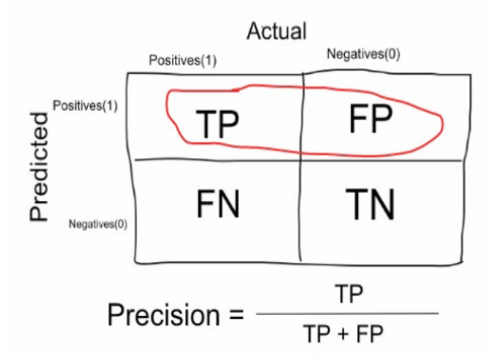 
- Precision is a measure that tells us what proportion of patients that we diagnosed as having cancer, actually had cancer. The predicted positives (People predicted as cancerous are TP and FP) and the people actually having a cancer are TP.  

- Ex: In our cancer example with 100 people, only 5 people have cancer. Let’s say our model is very bad and predicts every case as Cancer. Since we are predicting everyone as having cancer, our denominator(True positives and False Positives) is 100 and the numerator, person having cancer and the model predicting his case as cancer is 5. So in this example, we can say that Precision of such model is 5%.   

## Recall
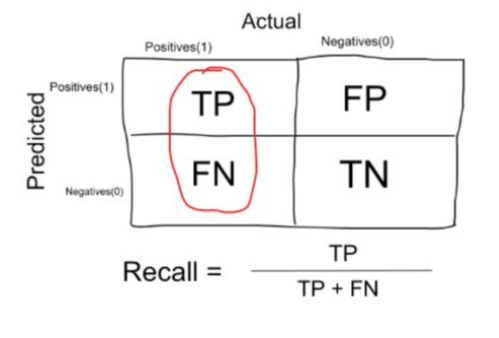 
- Recall is a measure that tells us what proportion of patients that actually had cancer was diagnosed by the algorithm as having cancer. The actual positives (People having cancer are TP and FN) and the people diagnosed by the model having a cancer are TP. (Note: FN is included because the Person actually had a cancer even though the model predicted otherwise).   

- Ex: In our cancer example with 100 people, 5 people actually have cancer. Let’s say that the model predicts every case as cancer.
- So our denominator(True positives and False Negatives) is 5 and the numerator, person having cancer and the model predicting his case as cancer is also 5(Since we predicted 5 cancer cases correctly). So in this example, we can say that the Recall of such model is 100%. And Precision of such a model(As we saw above) is 5%


### When to use Precision and When to use Recall?:
<span class="mark">It is clear that recall gives us information about a classifier’s performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives(how many did we caught).</span>  

**Precision** is about being precise. So even if we managed to capture only one cancer case, and we captured it correctly, then we are 100% precise.  

**Recall** is not so much about capturing cases correctly but more about capturing all cases that have “cancer” with the answer as “cancer”. So if we simply always say every case as “cancer”, we have 100% recall.  

So basically if we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to focus on minimising False positives, then our focus should be to make Precision as close to 100% as possible.  

## Specificity:
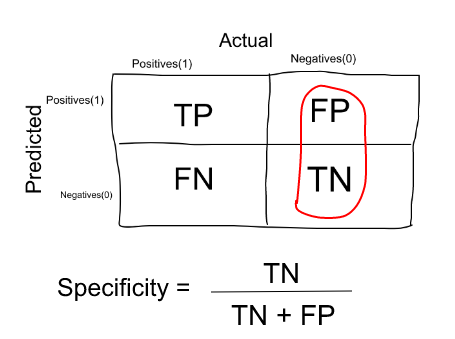
- Specificity is a measure that tells us what proportion of patients that did NOT have cancer, were predicted by the model as non-cancerous. The actual negatives (People actually NOT having cancer are FP and TN) and the people diagnosed by us not having cancer are TN. (Note: FP is included because the Person did NOT actually have cancer even though the model predicted otherwise).
- Specificity is the exact opposite of Recall.
- Ex: In our cancer example with 100 people, 5 people actually have cancer. Let’s say that the model predicts every case as cancer.
- So our denominator(False positives and True Negatives) is 95 and the numerator, person not having cancer and the model predicting his case as no cancer is 0 (Since we predicted every case as cancer). So in this example, we can that that Specificity of such model is 0%.

## Cross Validation
<span class="mark">Over-fitting is nothing but when you model become highly complex that it starts capturing noise also. This ‘noise’ adds no value to model, but only inaccuracy.</span>  

<span class="mark">Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.</span>

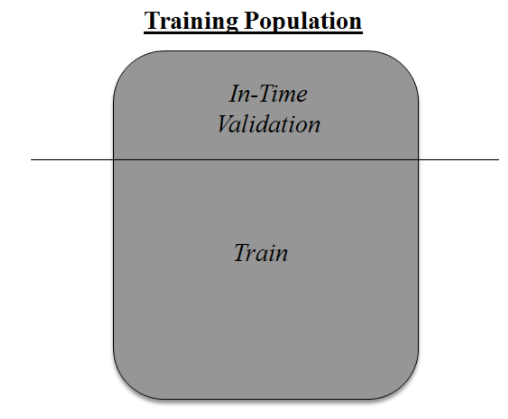
Above diagram shows how to validate model with in-time sample. We simply divide the population into 2 samples, and build model on one sample. Rest of the population is used for in-time validation.  

Could there be a negative side of the above approach?  

I believe, a negative side of this approach is that we loose a good amount of data from training the model. Hence, the model is very high bias. And this won’t give best estimate for the coefficients. So what’s the next best option?   

What if, we make a 50:50 split of training population and the train on first 50 and validate on rest 50. Then, we train on the other 50, test on first 50. This way we train the model on the entire population, however on 50% in one go. This reduces bias because of sample selection to some extent but gives a smaller sample to train the model on. This approach is known as 2-fold cross validation.  

### k-fold Cross validation
Let’s extrapolate the last example to k-fold from 2-fold cross validation. Now, we will try to visualize how does a k-fold validation work.  
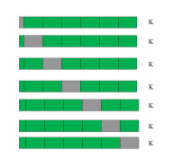
This is a 7-fold cross validation.  

Here’s what goes on behind the scene : we divide the entire population into 7 equal samples. Now we train models on 6 samples (Green boxes) and validate on 1 sample (grey box). Then, at the second iteration we train the model with a different sample held as validation. In 7 iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power. Once we have all the 7 models, we take average of the error terms to find which of the models is best.   

### How does this help to find best (non over-fit) model?
k-fold cross validation is widely used to check whether a model is an overfit or not. If the performance metrics at each of the k times modelling are close to each other and the mean of metric is highest.  


In [4]:
# importing the required libraries
import numpy as np
from sklearn.model_selection import KFold

# create a sample dataset
X = np.array([[1, 2, 3, 2],
             [3, 4, 1, 1],
             [1, 2, 1, 1],
             [3, 4, 1, 1]])

y = np.array([1, 2, 3, 4])

# create the object of the KFold
kf = KFold(n_splits=2)

print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)    
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


kf = KFold(n_splits=3)
print(kf)
KFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)    
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

ModuleNotFoundError: No module named 'sklearn'

### But how do we choose k?
This is the tricky part. We have a trade off to choose k.   

For a small k, we have a higher selection bias but low variance in the performances.   

For a large k, we have a small selection bias but high variance in the performances.   

Think of extreme cases :  

k = 2  : We have only 2 samples similar to our 50-50 example. Here we build model only on 50% of the population each time. But as the validation is a significant population, the variance of validation performance is minimal.  

k = number of observations (n) :  This is also known as “Leave one out”. We have n samples and modelling repeated n number of times leaving only one observation out for cross validation. Hence, the selection bias is minimal but the variance of validation performance is very large.  

Generally a value of k = 10 is recommended for most purpose.  
  
 